Research on residential load classification method based on Multi-model parallel integration algorithm

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB

Data Description:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.

c:\Users\hitom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hitom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


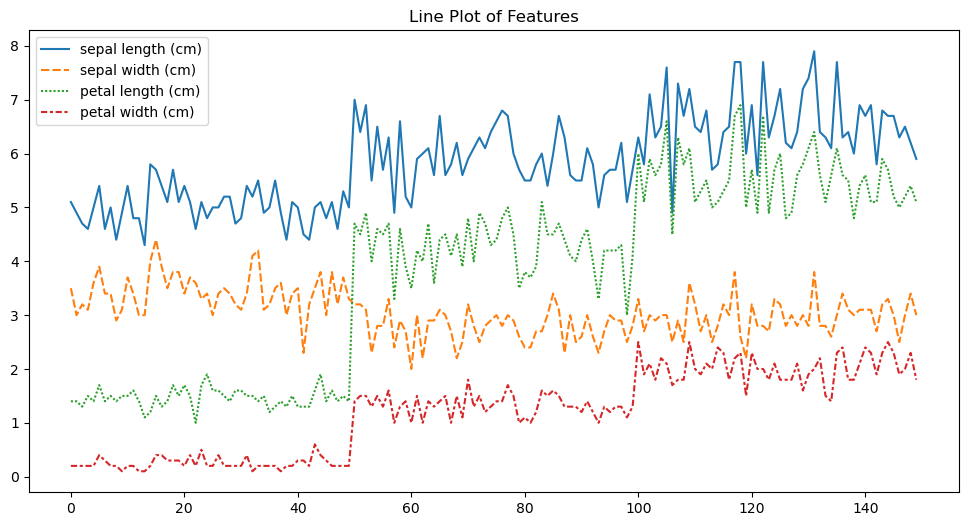

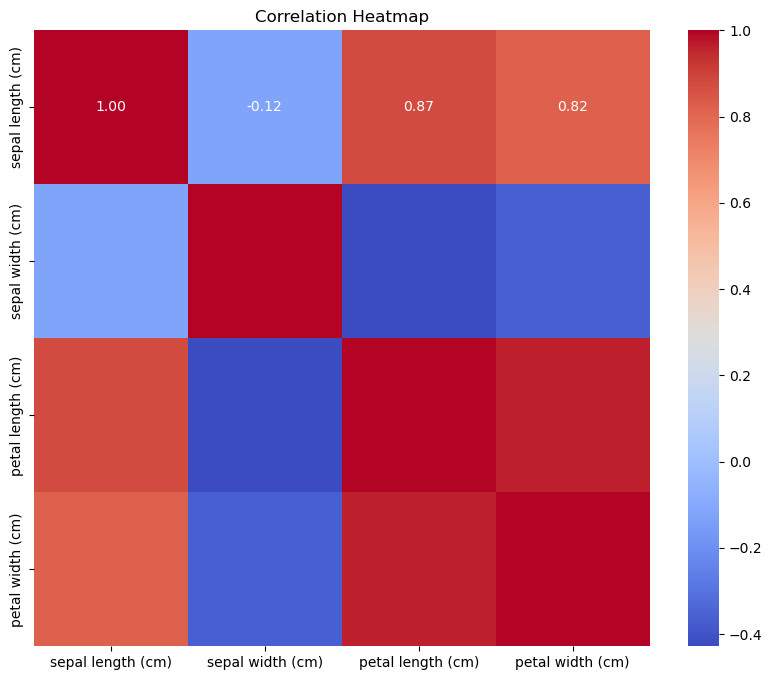

Numerical Columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Categorical Columns: []


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, recall_score, f1_score, precision_score, roc_curve, roc_auc_score,
    confusion_matrix, classification_report
)
from joblib import parallel_backend
from sklearn.utils import resample

# Load the Iris Dataset
iris = load_iris()
X, y = iris.data, iris.target
columns = iris.feature_names

# Convert to DataFrame for exploratory analysis
df = pd.DataFrame(X, columns=columns)
df['target'] = y

# Exploratory Analysis
print("Data Information:")
df.info()
print("\nData Description:")
print(df.describe())

# Visualizations
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.drop('target', axis=1))
plt.title("Line Plot of Features")
plt.show()

correlation = df.drop('target', axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, square=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Numerical Columns: {numerical_columns}")
print(f"Categorical Columns: {categorical_columns}")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base classifiers
rf_model = RandomForestClassifier(random_state=42)
nb_model = GaussianNB()
knn_model = KNeighborsClassifier()
mlp_model = MLPClassifier(random_state=42, max_iter=500)




In [ ]:
# Measure training time
start_time = time.time()

# Parallel training with threading backend
with parallel_backend('threading', n_jobs=-1):
    rf_model.fit(X_train, y_train)
    nb_model.fit(X_train, y_train)
    knn_model.fit(X_train, y_train)
    mlp_model.fit(X_train, y_train)

end_time = time.time()
print(f"Training Time: {end_time - start_time:.2f} seconds")


AttributeError: type object 'parallel_backend' has no attribute 'parallel_config'

In [3]:
# Measure training time
start_time = time.time()

# sequential ?
rf_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)

end_time = time.time()
print(f"Training Time: {end_time - start_time:.2f} seconds")


Training Time: 1.06 seconds


c:\Users\hitom\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:

# Make predictions
start_time = time.time()
# Parallel training with threading backend
with parallel_backend('threading', n_jobs=-1):
    rf_predictions = rf_model.predict(X_test)
    nb_predictions = nb_model.predict(X_test)
    knn_predictions = knn_model.predict(X_test)
    mlp_predictions = mlp_model.predict(X_test)


end_time = time.time()
print(f"Classification Time: {end_time - start_time:.2f} seconds")


Classification Time: 0.16 seconds


In [27]:

# Majority Voting for Ensemble Classifier
def majority_voting(*predictions):
    return pd.DataFrame(predictions).mode().iloc[0].values

ensemble_predictions = majority_voting(rf_predictions, nb_predictions, knn_predictions, mlp_predictions)

# Evaluation Method
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluation Report for {model_name}:")
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    roc_auc = "N/A"  # Multi-class ROC AUC not directly applicable here
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, zero_division=1)

    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"ROC AUC: {roc_auc}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Model Evaluation
evaluate_model(y_test, rf_predictions, "Random Forest")
evaluate_model(y_test, nb_predictions, "Naive Bayes")
evaluate_model(y_test, knn_predictions, "K-Nearest Neighbor")
evaluate_model(y_test, mlp_predictions, "Neural Network")
evaluate_model(y_test, ensemble_predictions, "Ensemble Classifier")


Evaluation Report for Random Forest:
Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0
Precision: 1.0
ROC AUC: N/A
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Evaluation Report for Naive Bayes:
Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0
Precision: 1.0
ROC AUC: N/A
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                       